In [13]:
import numpy as np
import matplotlib.pyplot as plt

from SALib.sample import saltelli
from SALib.analyze import sobol

from SALib.test_functions import Ishigami

In [14]:
Ishigami
# def TLMtwo(f,p):
   
#     omega = 2 * np.pi * np.array(f)
#     R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     delta2=1-delta1
#     k12=R2/R1
#     wc1=1/(R1*Q)
#     wc2=1/(R2*Q)
#     S1=np.sqrt((omega*1j)**alpha/wc1)
#     S2=np.sqrt((omega*1j)**alpha/wc2)
#     C1=1/np.tanh(delta1*S1)
#     C2=1/np.tanh(delta2*S2)

#     Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

#     return np.abs(Z)
def TLMtwo(f,p):
   
    omega = 2*np.pi*np.array(f)
    R1, R2, Q, delta1, alpha= p[0], p[1], p[2], p[3], p[4]
    # alpha=1
    delta2=1-delta1
    k12=R2/R1
    wc1=1/(R1*Q)
    wc2=1/(R2*Q)
    S1=np.sqrt((omega*1j)**alpha/wc1)
    S2=np.sqrt((omega*1j)**alpha/wc2)
    C1=1/np.tanh(delta1*S1)
    C2=1/np.tanh(delta2*S2)

    Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

    return np.abs(Z)

# def TLMtwo(f,p):
   
#     omega = 2 * np.pi * np.array(f)
#     R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     Z=R1+R2**alpha+omega*delta1+Q*omega

#     return np.abs(Z)

# def TLMtwo(f,R1, R2, Q, delta1, alpha):
   
#     omega = 2 * np.pi * np.array(f)
#     # R1, R2, Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
#     Z=R1+R2**alpha+omega*delta1+Q*omega

#     return np.abs(Z)

In [15]:
problem ={
    'num_vars': 5,
    'names': ['R1','R2', 'Q', 'δ1', 'α'],
    'bounds': [[500,2000],[500,2000],[1e-4,1e-3],[0.5,0.99],[0.8,1]]
}


In [16]:
param_values = saltelli.sample(problem, 10000)

print(param_values)

# evaluate
f = np.logspace(-2, 2, 50)
y = np.array([TLMtwo(f, params) for params in param_values])

# print(param_values.shape)
# print(y.shape)
# print(y)
# analyse
sobol_indices = [sobol.analyze(problem, Y) for Y in y.T]

# print("Sobol Indices")
# print(sobol_indices)

C:\Users\admin\AppData\Local\Temp\ipykernel_17064\1138150742.py:1: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 10000)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10000) is equal to `2^n`.
        
  warnings.warn(msg)


[[5.00137329e+02 1.09999084e+03 6.64065552e-04 6.03464050e-01
  9.86444092e-01]
 [1.12077332e+03 1.09999084e+03 6.64065552e-04 6.03464050e-01
  9.86444092e-01]
 [5.00137329e+02 6.86080933e+02 6.64065552e-04 6.03464050e-01
  9.86444092e-01]
 ...
 [9.42337036e+02 6.12014771e+02 3.02725220e-04 6.85499573e-01
  8.08685303e-01]
 [9.42337036e+02 6.12014771e+02 3.02725220e-04 7.78750305e-01
  9.68389893e-01]
 [9.42337036e+02 6.12014771e+02 3.02725220e-04 7.78750305e-01
  8.08685303e-01]]


C:\Users\admin\AppData\Local\Temp\ipykernel_17064\3290739896.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


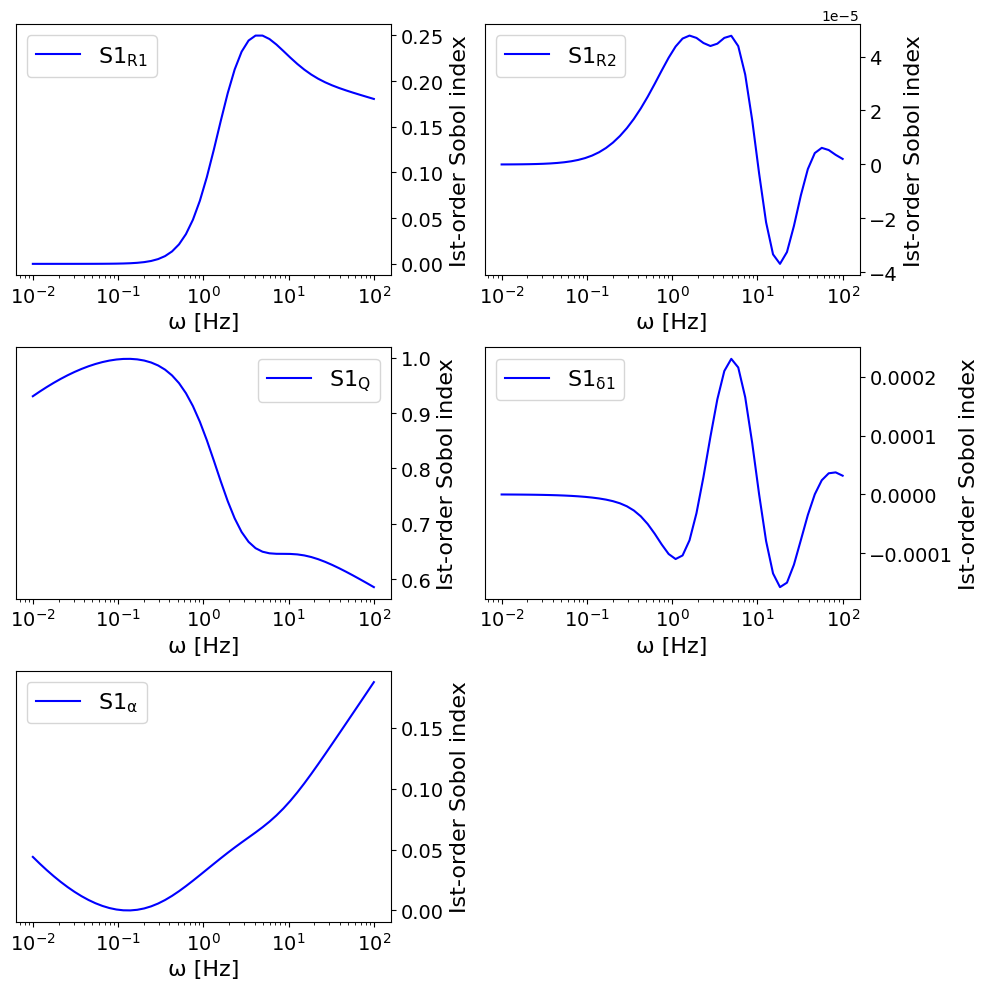

In [17]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[2, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4]):
    ax.plot(f, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xscale("log")
    ax.set_xlabel("ω [Hz]",fontsize=16) 
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    # ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if i==2:

        ax.legend(loc='upper right',fontsize=16)
    else:
        ax.legend(loc='upper left',fontsize=16)

fig.tight_layout()
fig.savefig("ownSobol.png",dpi=800)
plt.show()

In [ ]:
S1s = np.array([s['S1'] for s in sobol_indices])

fig = plt.figure(figsize=(10, 10), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[2, 1])
# ax2 = fig.add_subplot(gs[1, 1])

for i, ax in enumerate([ax0, ax1, ax2, ax3, ax4]):
    ax.plot(f, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(problem["names"][i]),
            color='blue')
    ax.set_xscale("log")
    ax.set_xlabel("ω [Hz]",fontsize=16) 
    ax.set_ylabel("Ist-order Sobol index",fontsize=16)

    # ax.set_ylim(0, 1.04)
    ax.tick_params(labelsize=14)
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if i==2:

        ax.legend(loc='upper right',fontsize=16)
    else:
        ax.legend(loc='upper left',fontsize=16)

fig.tight_layout()
fig.savefig("ownSobol.png",dpi=800)
plt.show()